# CHAPTER 9
# Plotting and Visualization
- Making informative visualizations is one of the most important tasks in data analysis. 
- It may be a part of the exploratory process - for example, to help identify outliers or needed data transformations, or as a way of generating ideas for models.
- This chapter will focus on [**matplotlib**](https://matplotlib.org/) and [**seaborn**](http://seaborn.pydata.org/).
- The matplotlib gallery and documentation are the best resource for learning advanced features.
- To use interactive plotting in the Jupyter notebook you need to run the following statement:
        %matplotlib notebook

## A Brief matplotlib API Primer

In [41]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
import pandas as pd
import seaborn as sns
%matplotlib notebook

<IPython.core.display.Javascript object>


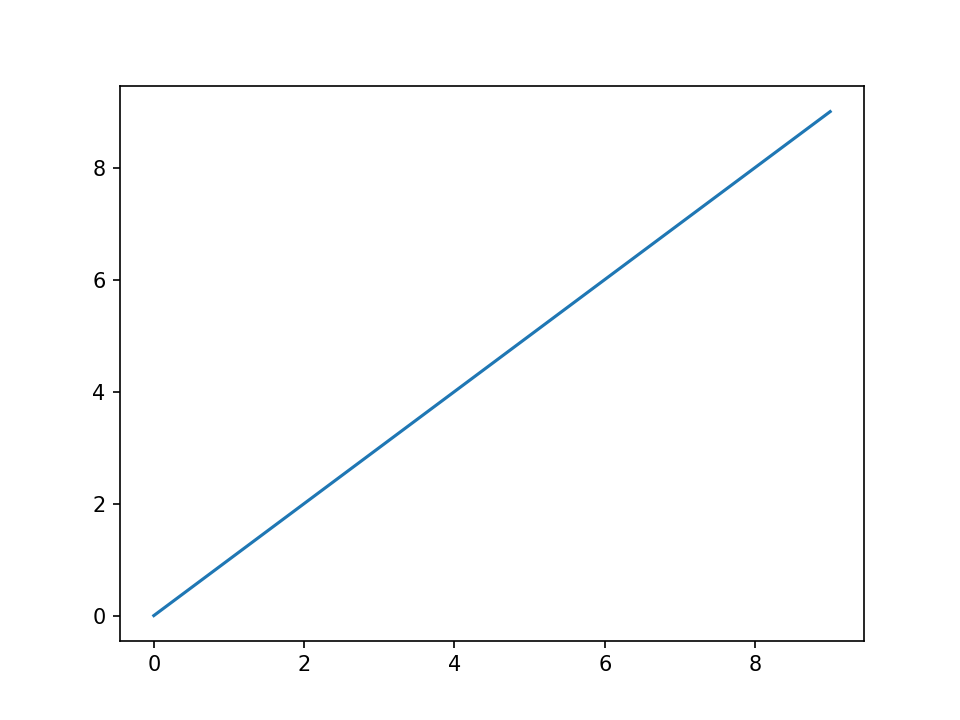

In [46]:
# Create dummy data for a line plot
data = np.arange(10)

plt.plot(data)

### Figures and Subplots
- Plots in **matplotlib** reside within a **Figure** object. 
- You can create a new figure with **plt.figure**.
- **plt.figure** has a number of options: **figsize** will guarantee the figure has a certain size and aspect ratio if saved to disk.
- You can’t make a plot with a blank figure. You have to create one or more subplots using **add_subplot**.
- In **Jupyter notebooks** plots reset after each cell is evaluated, so for more complex plots you must put all of the plotting commands in a single notebook cell.
- When you issue a plotting command like **plt.plot**, matplotlib draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation.

<IPython.core.display.Javascript object>


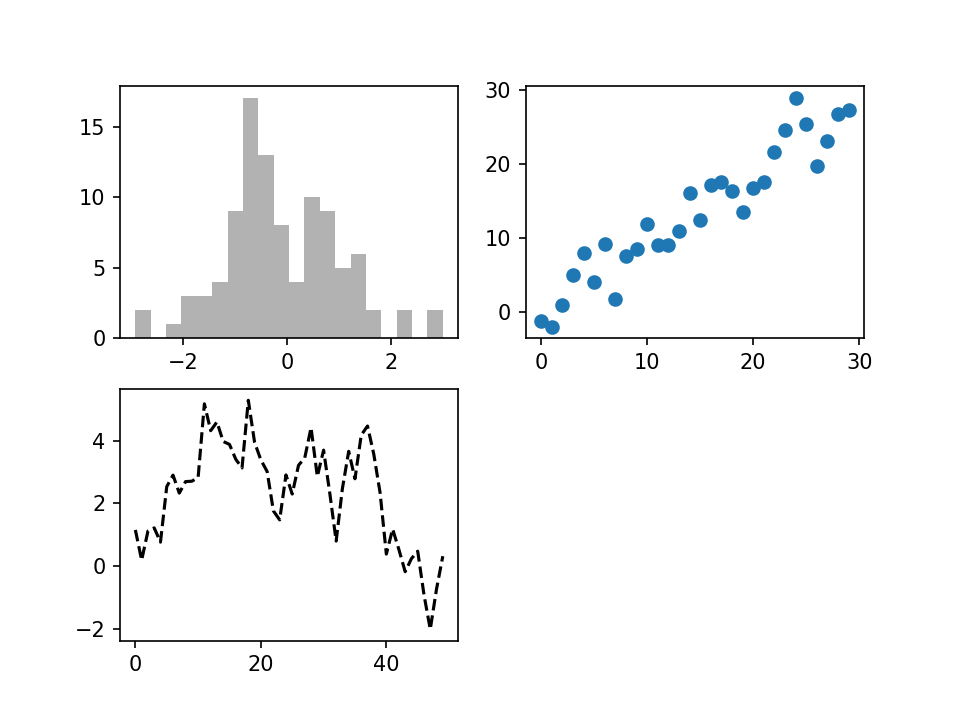

In [47]:
# Create a new empty Figure object
fig = plt.figure()

# Create subplots for a 2x2 Figure (contains 4 subplots)
ax1 = fig.add_subplot(2, 2, 1) # first subplot
ax2 = fig.add_subplot(2, 2, 2) # second subplot
ax3 = fig.add_subplot(2, 2, 3) # thirsd subplot

In [48]:
# Running the plt.plot command matplotlib draws on the last figure and subplot used
# In our case this is subplot 3 from above
plt.plot(np.random.randn(50).cumsum(), 'k--')

- The **'k--'** is a style option instructing matplotlib to plot a black **dashed** line. 
- The objects returned by **fig.add_subplot** are **AxesSubplot objects**, on which you can directly plot on the other empty subplots by calling each one’s instance method.

In [49]:
# Plot a histogram in the first AxesSubplot object from above
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

# Plot a scatter plot in the second AxesSubplot object from above
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

- Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, **plt.subplots**, that creates a new figure and returns a NumPy array containing the created subplot objects.
- This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example, axes[0, 1]. 
- You can also indicate that subplots should have the same x- or y-axis using **sharex** and **sharey**, respectively.

<IPython.core.display.Javascript object>


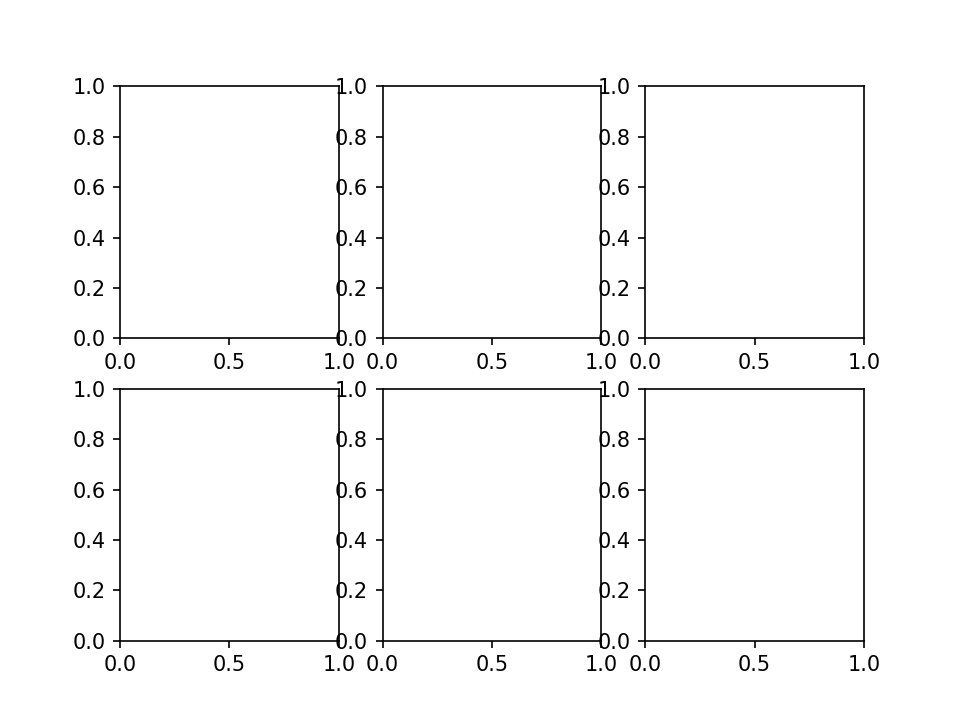

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [50]:
# Create a grid of subplots
fig, axes = plt.subplots(2, 3)
axes

**TABLE**: pyplot.subplots options

| Argument                  | Description |
| :---                  |    :----    |
|nrows| Number of rows of subplots
|ncols| Number of columns of subplots
|sharex| All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)
|sharey| All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)
|subplot_kw| Dict of keywords passed to add_subplot call used to create each subplot
|**fig_kw| Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))

### Adjusting the spacing around subplots
- By default **matplotlib** leaves a certain amount of **padding** around the outside of the subplots and spacing between subplots. 
- This spacing is all specified relative to the **height and width** of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. 
- You can change the spacing using the **subplots_adjust** method on Figure objects, also available as a top-level function:
        subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
- **wspace and hspace** controls the percent of the figure width and figure height, respectively, to use as spacing between subplots.

<IPython.core.display.Javascript object>


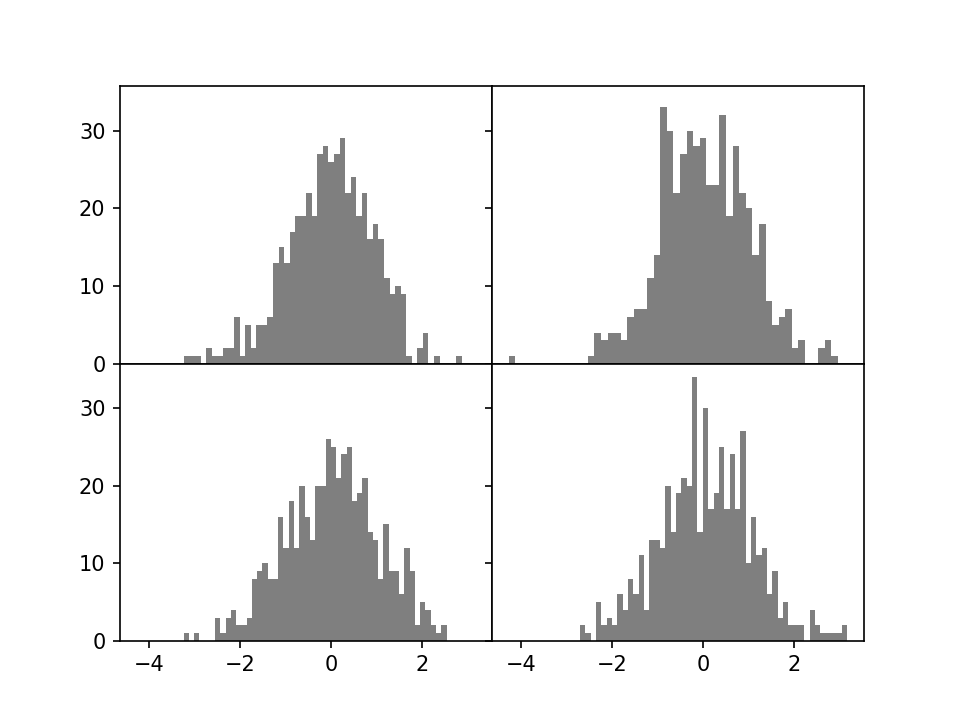

In [51]:
# Create a grid of 4 subplots
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

# Adjust the spacing all the way to zero
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles
- Matplotlib’s main **plot** function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style.
- There are a number of **color abbreviations** provided for commonly used colors, but you can use any color on the spectrum by specifying its hex code.
        ax.plot(x, y, 'g--')  # plot x vs y with green dashes
        ax.plot(x, y, linestyle='--', color='g')  # specify linestyle & color separately
- Line plots can additionally have **markers** to highlight the actual data points. The marker can be part of the **style string**, which must have color followed by marker type and line style

<IPython.core.display.Javascript object>


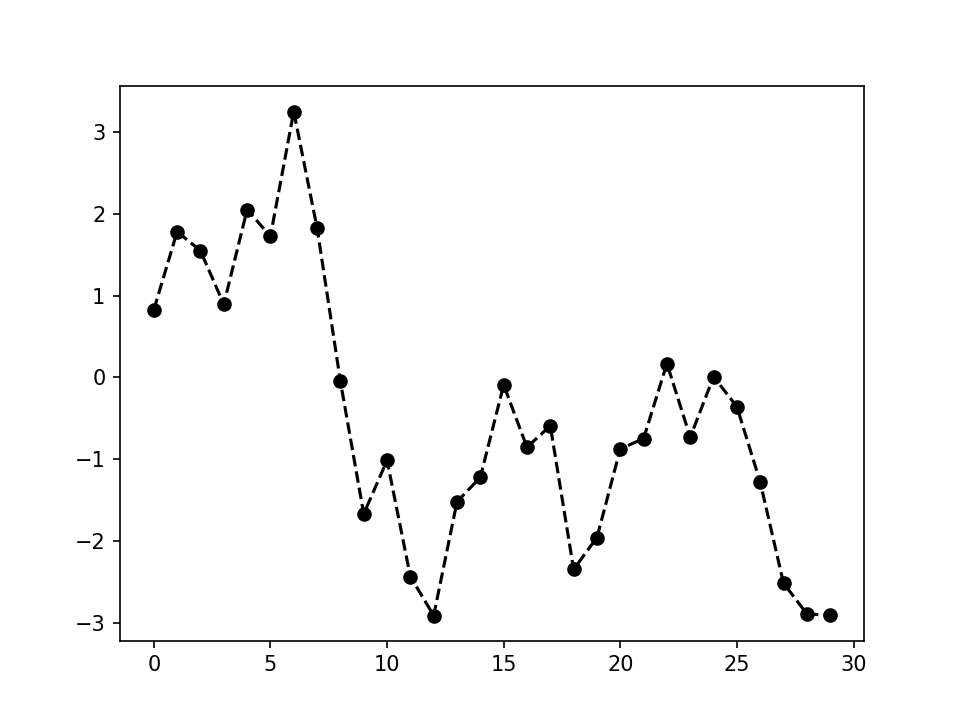

In [52]:
# Line plot with markers 'k' = black color, 'o' = whole circle markers, '--' = dashed line

# Create a new Figure object
plt.figure()
#plt.plot(randn(30).cumsum(), 'ko--')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


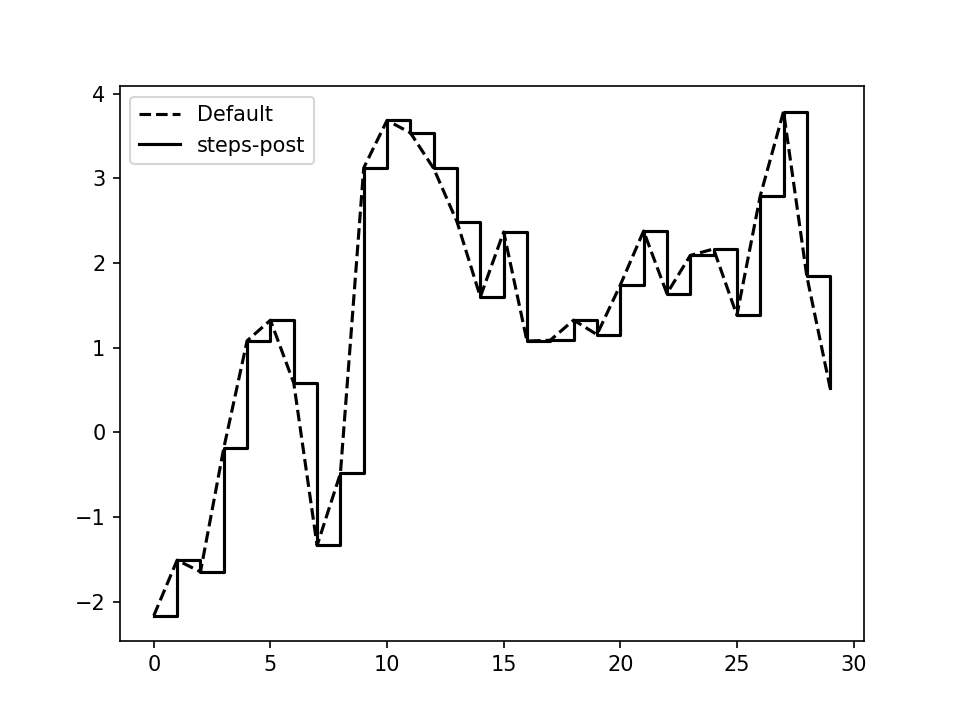

In [53]:
# By default points are linearly interpolated by default
# This can be altered with the drawstyle option

# Create an array
data = np.random.randn(30).cumsum()

# Create a new Figure object
plt.figure()

# Line plot with default linearly interpolated points
plt.plot(data, 'k--', label='Default')

# Line plot with step-wise interpolated points
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

# Add a legend
plt.legend(loc='best')

### Ticks, Labels, and Legends
#### Setting the title, axis labels, ticks, and ticklabels

<IPython.core.display.Javascript object>


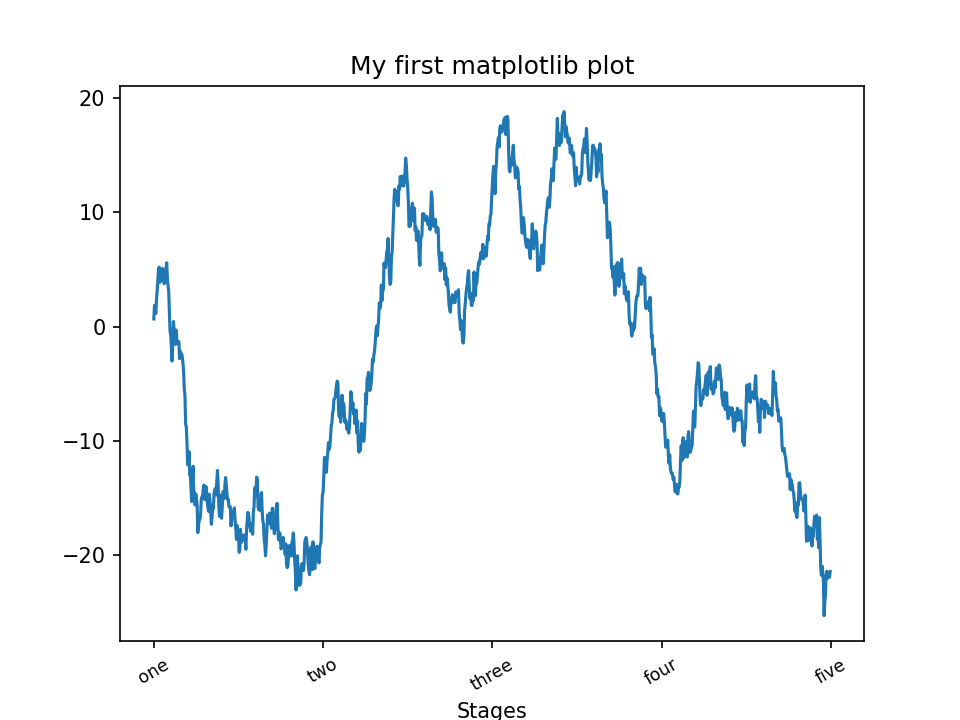

In [54]:
# Create a new Figure ogject and plot of a random walk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [55]:
# To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# Set the labels for the ticks
# The rotation option sets the x tick labels at a 30-degree rotation
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

# Set the plot title
ax.set_title('My first matplotlib plot')

# Set the x-axis label
ax.set_xlabel('Stages')

Text(0.5, 36.283333333333324, 'Stages')

### Adding legends
- Legends are another critical element for identifying plot elements. 
- The easiest is to pass the **label** argument when adding each piece of the plot.
- The legend method has several other choices for the location **loc** argument.
- The **loc** tells matplotlib where to place the plot. 
- If you choose **'best'** is a good option, as it will choose a location that is most out of the way. 
- To exclude one or more elements from the legend, pass no label or **label='_nolegend_'**.

<IPython.core.display.Javascript object>


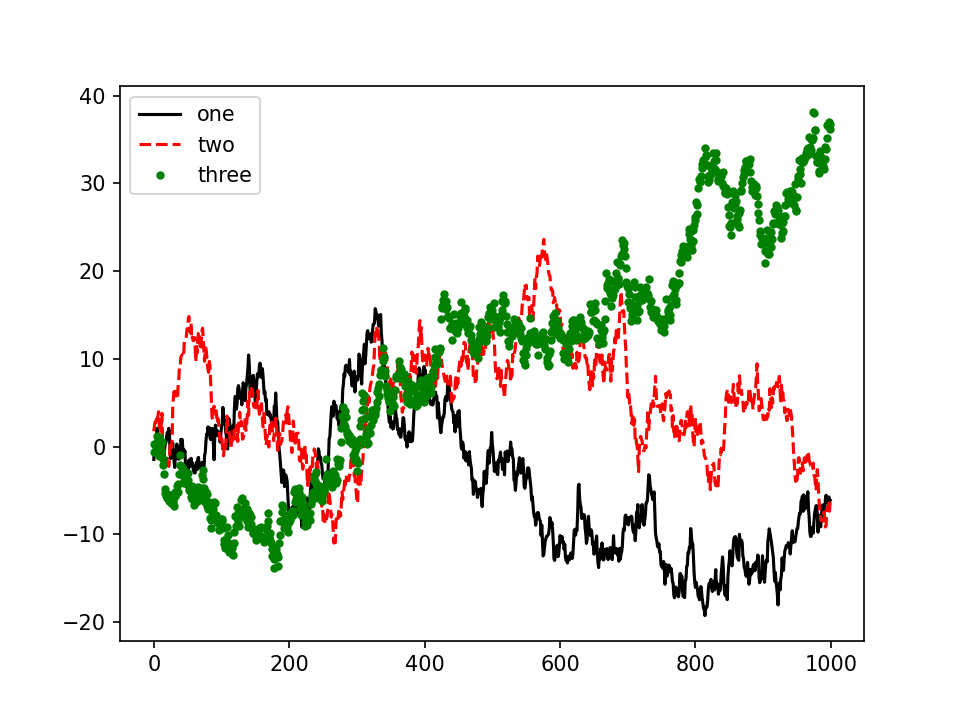

In [56]:
# Create a new Figure object
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

# Line plot continous line, black with label 'one'
ax.plot(randn(1000).cumsum(), 'k', label='one')

# Line plot dashed line, red with label 'two'
ax.plot(randn(1000).cumsum(), 'r--', label='two')

# Line plot dotted, green with label '3'
ax.plot(randn(1000).cumsum(), 'g.', label='three')

# Create the legend
ax.legend(loc='best')

### Annotations and Drawing on a Subplot
- Plot **annotations** could consist of text, arrows, or other shapes. 
- You can add **annotations** and text using the **text**, **arrow**, and **annotate** functions. 
- **text** draws text at given coordinates (x, y) on the plot with optional custom styling:
        ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

**EXAMPLE**: - plot the closing S&P 500 index price since 2007 (obtained from Yahoo! Finance) and annotate it with some of the important dates from the 2008–2009 financial crisis.

In [57]:
# Import the datetime module
from datetime import datetime

In [58]:
# Import the data
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx

1990-02-01     328.79
1990-02-02     330.92
1990-02-05     331.85
1990-02-06     329.66
1990-02-07     333.75
               ...   
2011-10-10    1194.89
2011-10-11    1195.54
2011-10-12    1207.25
2011-10-13    1203.66
2011-10-14    1224.58
Name: SPX, Length: 5472, dtype: float64

<IPython.core.display.Javascript object>


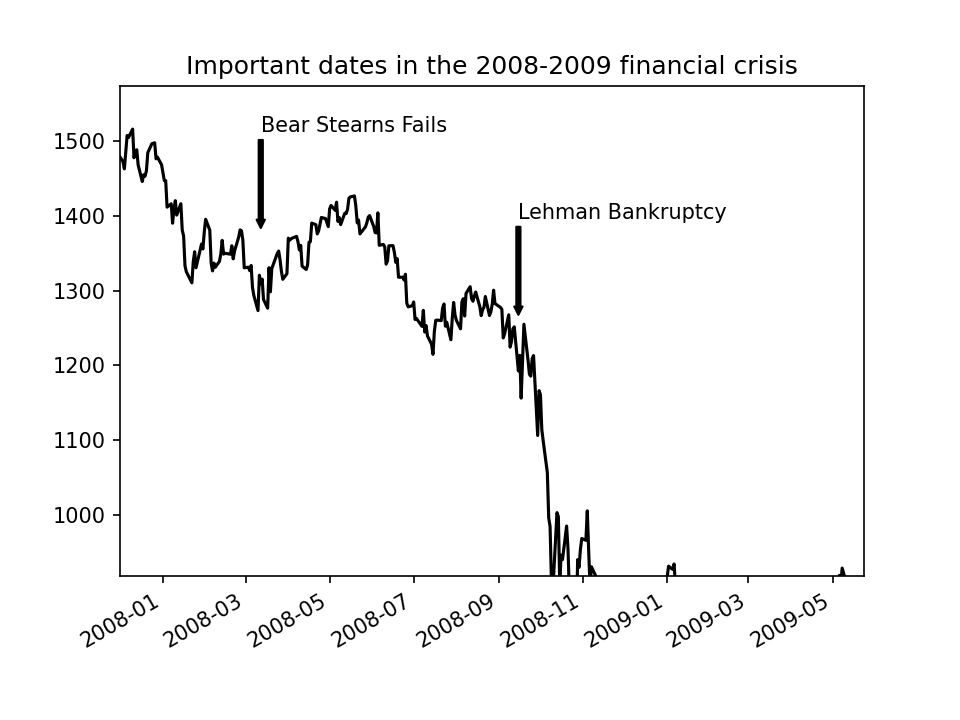

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [59]:
# Create a new Figure object with a subplot
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

# Default line plot of spx index vs time
spx.plot(ax=ax, style='k-')

# Create the labels for important financial moments
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]

# Annotate the points created in crisis_data
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
                horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

# Set the title
ax.set_title('Important dates in the 2008-2009 financial crisis')

- **matplotlib** has objects that represent many common shapes, referred to as **patches**. 
- Some of these, like **Rectangle** and **Circle**, are found in **matplotlib.pyplot**, but the full set is located in **matplotlib.patches**.
- To add a shape to a plot, you create the **patch object shp** and add it to a subplot by calling **ax.add_patch(shp)**.

<IPython.core.display.Javascript object>


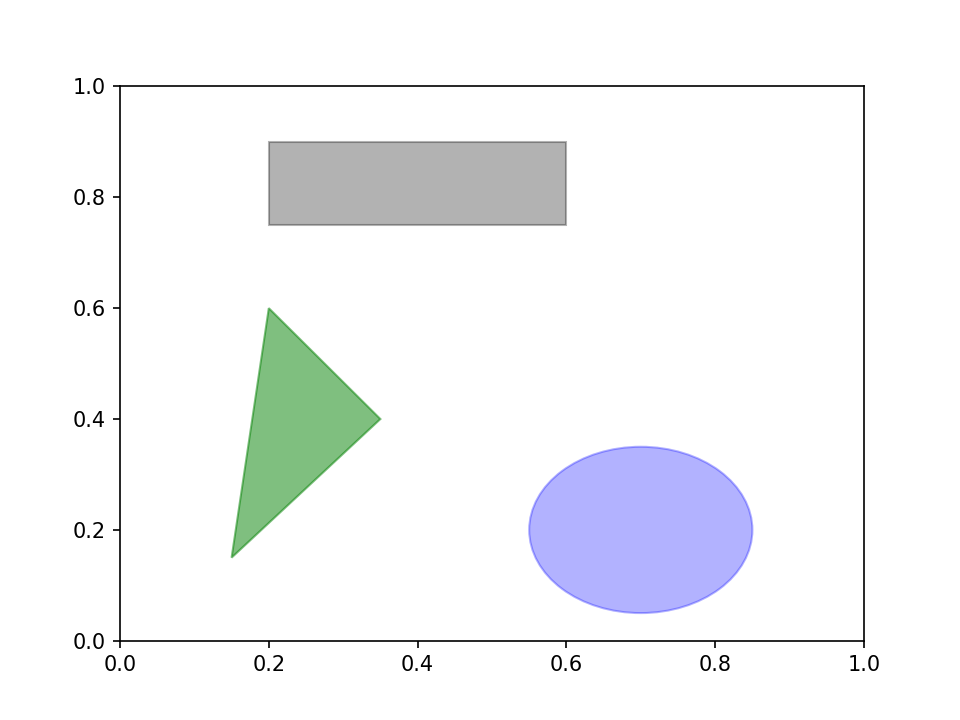

In [60]:
# Create a new Figure object & add a subplot
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

# Create 3 patch objects with different shapes & colors
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

# Add the shapes to the plot
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File
- You can save the active figure to file using **plt.savefig**.
- The file type is inferred from the file extension.
- Common parameters are **dpi** - which controls the dots-per-inch resolution, and **bbox_inches** - which can trim the whitespace around the actual figure.

In [61]:
# File path
pwd = %pwd
filepath = pwd + '/examples/output/test.png'

# Save the active figure as PNG with minimal whitespace around the plot 
# and at 400 DPI
plt.savefig(filepath, dpi=400, bbox_inches='tight')

**TABLE**: Figure.savefig options

| Argument                  | Description |
| :---                  |    :----    |
|fname| String containing a filepath or a Python file-like object. The figure format is inferred from the file extension (e.g., .pdf for PDF or .png for PNG)
|dpi| The figure resolution in dots per inch; defaults to 100 out of the box but can be configured
|facecolor, edgecolor| The color of the figure background outside of the subplots; 'w' (white), by default
|format| The explicit file format to use ('png', 'pdf', 'svg', 'ps', 'eps', ...)
|bbox_inches| The portion of the figure to save; if 'tight' is passed, will attempt to trim the empty space around the figure

### matplotlib Configuration
- **matplotlib** comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. 
- Fortunately, nearly all of the default behavior can be customized via an extensive set of **global parameters** governing *figure size, subplot spacing, colors, font sizes, grid styles*, and so on. 
- One way to modify the configuration programmatically from Python is to use the **rc method**; for example, to set the global default figure size to be 10 × 10, you could enter:
        plt.rc('figure', figsize=(10, 10))
- The first argument to **rc** is the component you wish to customize, such as *'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend'*, or many others. 
- After that can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in your program is as a dict:
        font_options = {'family' : 'monospace',
                        'weight' : 'bold',
                        'size' : 'small'}
        plt.rc('font', **font_options)
- **matplotlib** comes with a configuration file **matplotlibrc** in the **matplotlib/mpl-data** directory. If you customize this file and place it in your home directory titled **.matplotlibrc**, it will be loaded each time you use matplotlib.

## Plotting with pandas and seaborn
- **matplotlib** can be a fairly low-level tool. You assemble a plot from its base components: the data display (i.e., the type of plot: line, bar, box, scatter, contour, etc.), legend, title, tick labels, and other annotations.
- **pandas** itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. 
- Another library is **seaborn** which simplifies creating many common visualization types.
- Importing **seaborn** modifies the default matplotlib color schemes and plot styles to improve readability and aesthetics.

### Line Plots
- Series and DataFrame each have a **plot attribute** for making some basic plot types. 
- By default, **plot()** makes line plots.

In [62]:
# Create a Series object
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.head()

0     0.306111
10    1.574055
20    2.086942
30   -0.271562
40   -0.593911
dtype: float64

<IPython.core.display.Javascript object>


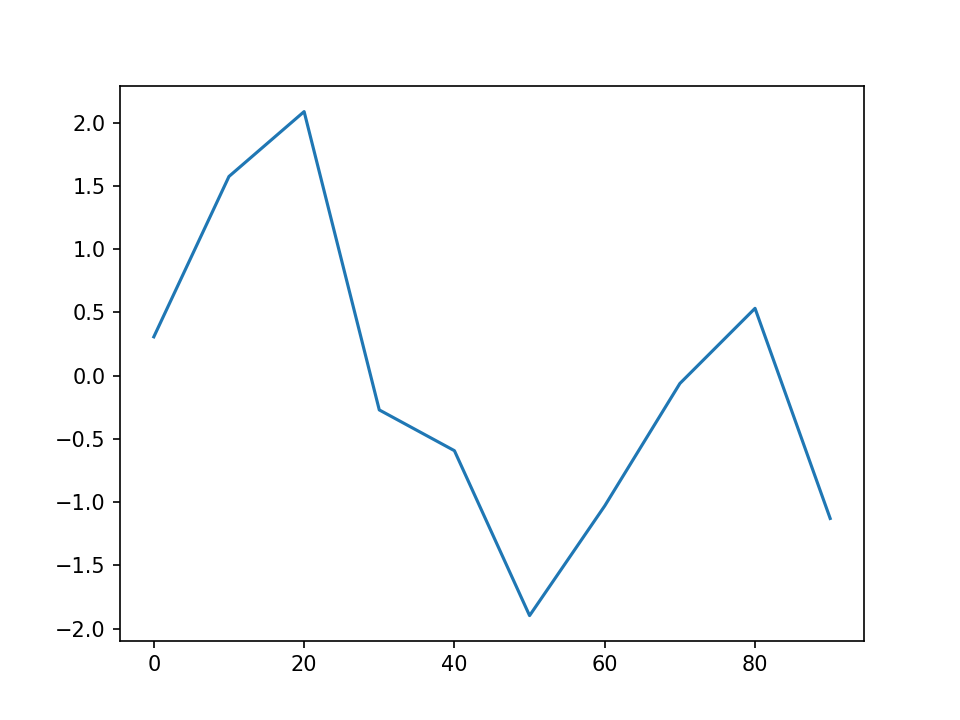

<AxesSubplot:>

In [63]:
# Create a new Figure object
fig = plt.figure()

# Line plot using pandas plot() attribute for series
s.plot()

- The Series object’s **index** is passed to matplotlib for plotting on the x-axis, though you can disable this by passing **use_index=False**. 
- The **x-axis ticks and limits** can be adjusted with the **xticks and xlim options**, and y-axis respectively with **yticks and ylim**.
- Most of pandas’s plotting methods accept an optional **ax parameter**, which can be a matplotlib subplot object.
- DataFrame’s **plot** method plots each of its columns as a different line on the same subplot, creating a legend automatically.
- The plot attribute contains a “family” of methods for different plot types. For example, **df.plot()** is equivalent to **df.plot.line()**.
- DataFrame has a number of options allowing some flexibility with how the columns are handled; for example, whether to plot them all on the same subplot or to create separate subplots.
- Additional keyword arguments to plot are passed through to the respective **matplotlib** plotting function.

In [64]:
# Create a DataFrame object
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.head()

,A,B,C,D
0,0.168480,0.143311,-1.569559,0.311360
10,0.916266,-0.848749,-1.106510,0.490346
20,0.531755,-0.772022,-1.820119,-0.795902
30,-0.434461,-0.272743,-0.424248,-0.130996
40,0.417239,-1.434881,-0.351146,-0.927324


<IPython.core.display.Javascript object>


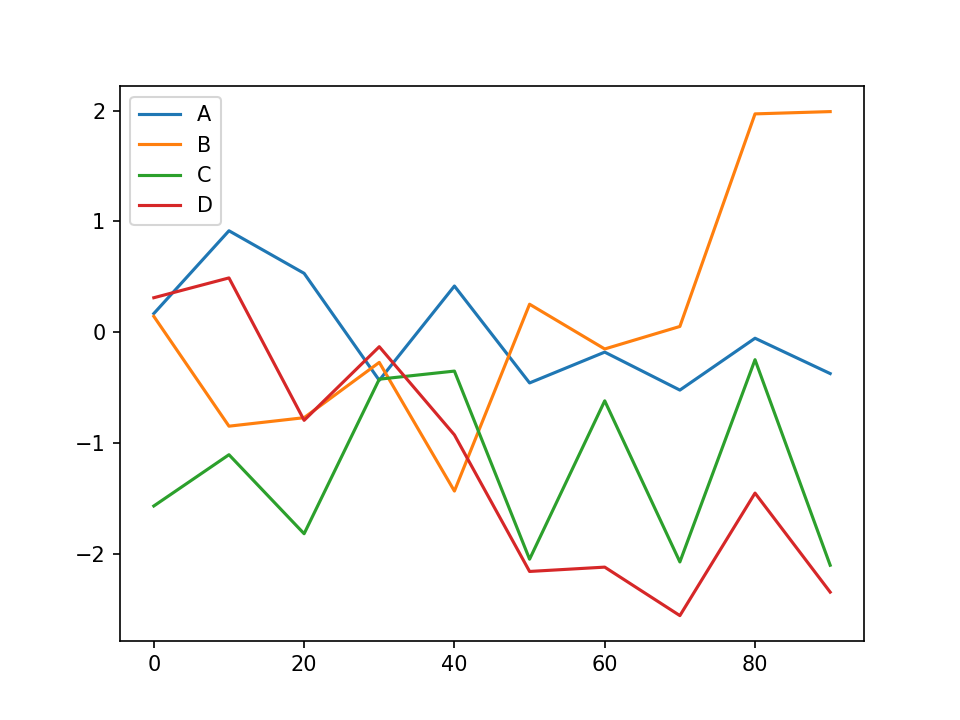

<AxesSubplot:>

In [65]:
# Line plot using pandas plot() attribute for DataFrame
df.plot()

**TABLE**: Series.plot method arguments

| Argument                  | Description |
| :---                  |    :----    |
|label| Label for plot legend
|ax| matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot
|style| Style string, like 'ko--', to be passed to matplotlib
|alpha| The plot fill opacity (from 0 to 1)
|kind| Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'
|logy| Use logarithmic scaling on the y-axis
|use_index| Use the object index for tick labels
|rot| Rotation of tick labels (0 through 360)
|xticks| Values to use for x-axis ticks
|yticks| Values to use for y-axis ticks
|xlim| x-axis limits (e.g., [0, 10])
|ylim| y-axis limits
|grid| Display axis grid (on by default)

**TABLE**: DataFrame-specific plot arguments

| Argument                  | Description |
| :---                  |    :----    |
|subplots| Plot each DataFrame column in a separate subplot
|sharex| If subplots=True, share the same x-axis, linking ticks and limits
|sharey| If subplots=True, share the same y-axis
|figsize| Size of figure to create as tuple
|title| Plot title as string
|legend| Add a subplot legend (True by default)
|sort_columns| Plot columns in alphabetical order; by default uses existing column order

### Bar Plots
- The **plot.bar()** and **plot.barh()** make vertical and horizontal bar plots, respectively. 
- In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks.
- With a DataFrame, **bar plots** group the values in each row together in a group in bars, side by side, for each value.
- A useful recipe for bar plots is to visualize a Series’s value frequency using value_counts: 
        s.value_counts().plot.bar()

<IPython.core.display.Javascript object>


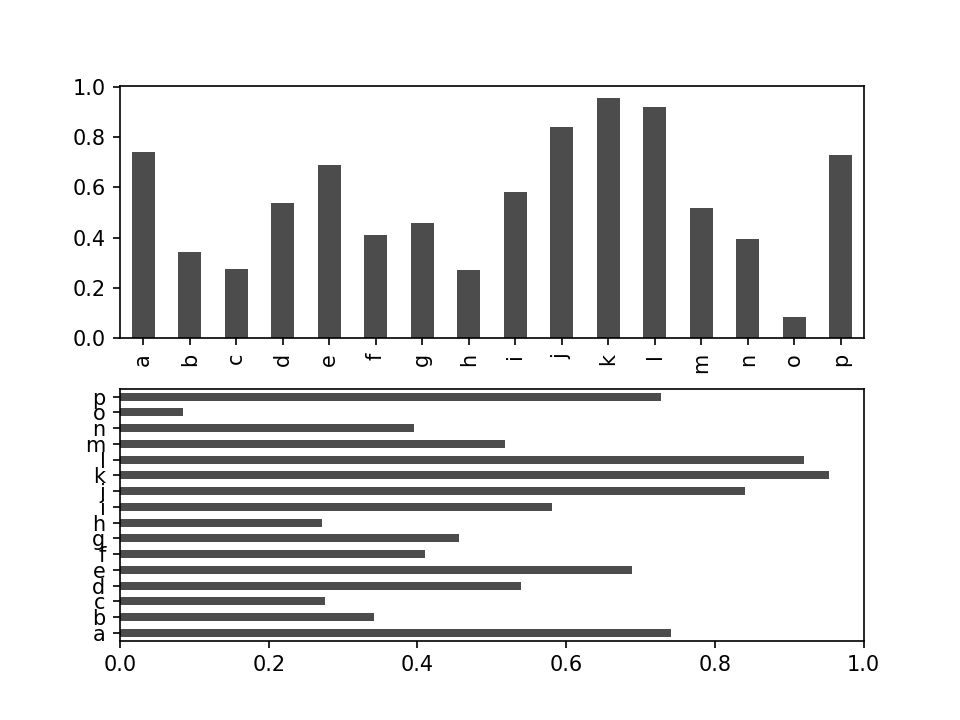

<AxesSubplot:>

In [66]:
# Create new Figure object with 2 subplots
fig, axes = plt.subplots(2, 1)

# Create a Series
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

# Plot a vertical bar chart with black color and transaprency 0.7
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

# Plot a horizontal bar chart with black color and transaprency 0.7
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [67]:
# Create a DataFrame
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.287487,0.372948,0.784936,0.707275
two,0.897465,0.252865,0.315669,0.704942
three,0.763833,0.802570,0.240491,0.168556
four,0.722204,0.833197,0.703942,0.777791
five,0.775341,0.988662,0.396011,0.279841
six,0.103250,0.744129,0.562487,0.124057


<IPython.core.display.Javascript object>


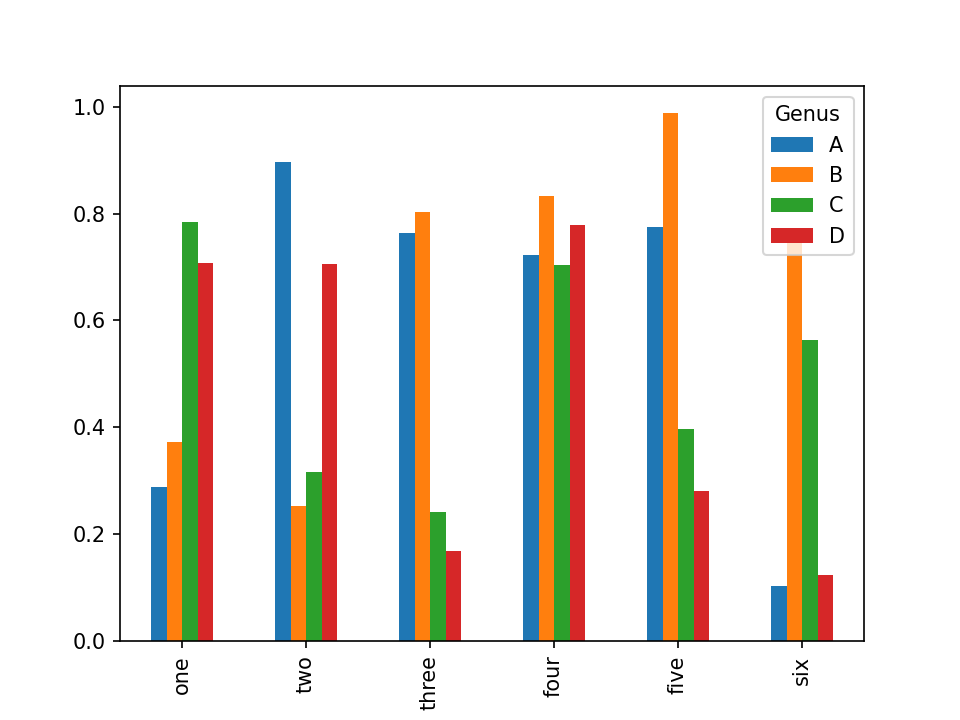

<AxesSubplot:>

In [68]:
# Bar plot with default parameters
df.plot.bar()

<IPython.core.display.Javascript object>


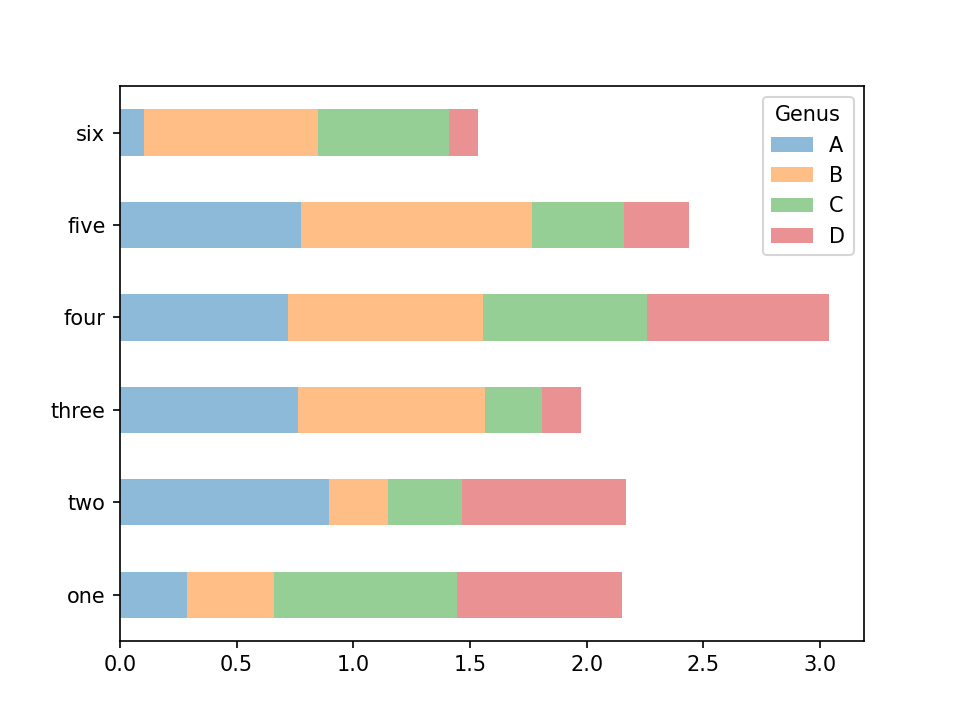

<AxesSubplot:>

In [69]:
# Create a horizontal stacked barplot
df.plot.barh(stacked=True, alpha=0.5)

**EXAMPLE**: Tipping dataset - make a stacked bar plot showing the percentage of data points for each party size on each day.

In [70]:
# Load the data
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [71]:
# Cross-tabulation by day and party size
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [72]:
# Not many 1- and 6-person parties so select only parties of 2,3,4,5 persons
party_counts = party_counts.loc[:, 2:5]

# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


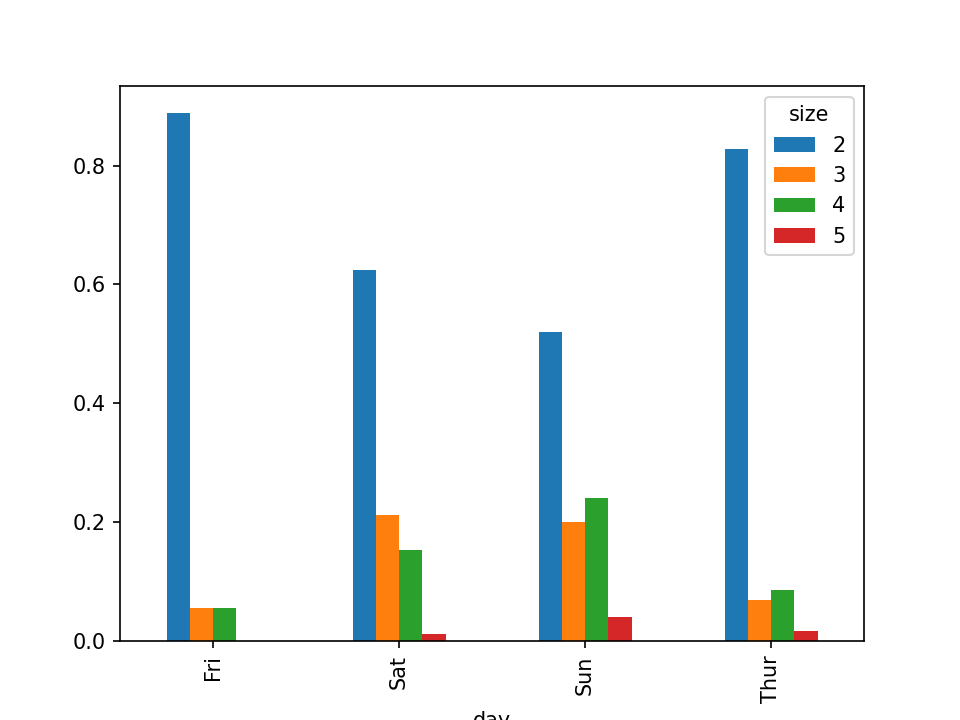

<AxesSubplot:xlabel='day'>

In [73]:
# Bar plot for fraction of parties by size on each day
party_pcts.plot.bar()

- With data that requires aggregation or summarization before making a plot, using the **seaborn** package can make things much simpler. 
- Let’s look now at the tipping percentage by day with **seaborn**.

<IPython.core.display.Javascript object>


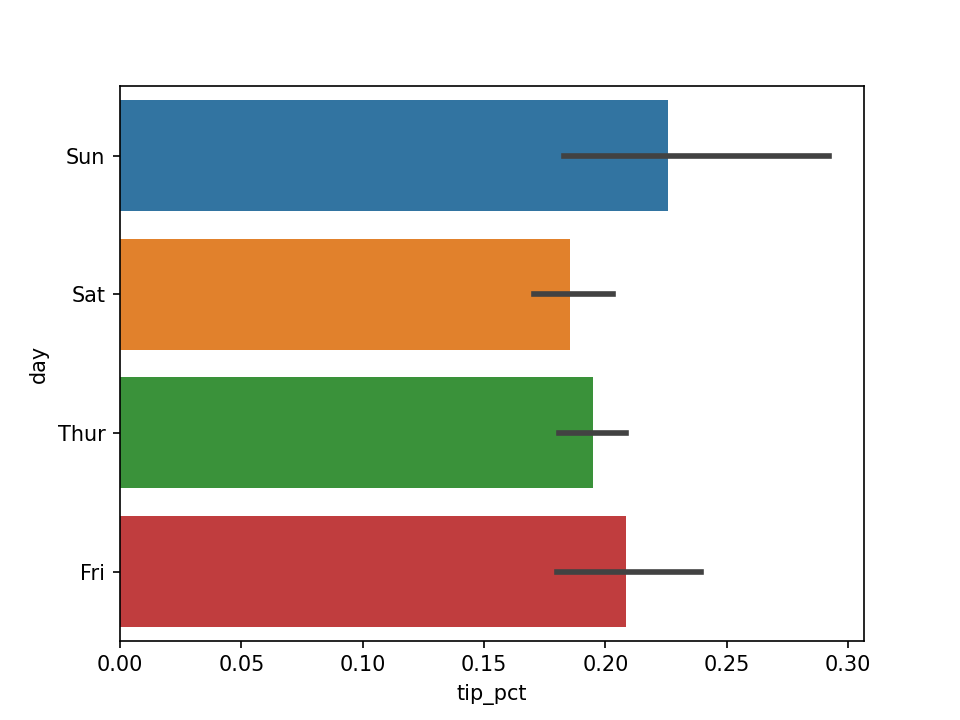

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [74]:
# Tipping percentage by day
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

# Create a new Figure object
fig = plt.figure()

# Use seaborn to plot a barplot
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

- Plotting functions in **seaborn** take a **data argument**, which can be a pandas DataFrame. The other arguments refer to column names. 
- Because there are multiple observations for each value in the day, the bars are the **average** value of tip_pct. 
- The black lines drawn on the bars represent the 95% confidence interval (this can be con‐ figured through optional arguments).
- **seaborn.barplot** has a **hue** option that enables us to split by an additional categorical value.

<IPython.core.display.Javascript object>


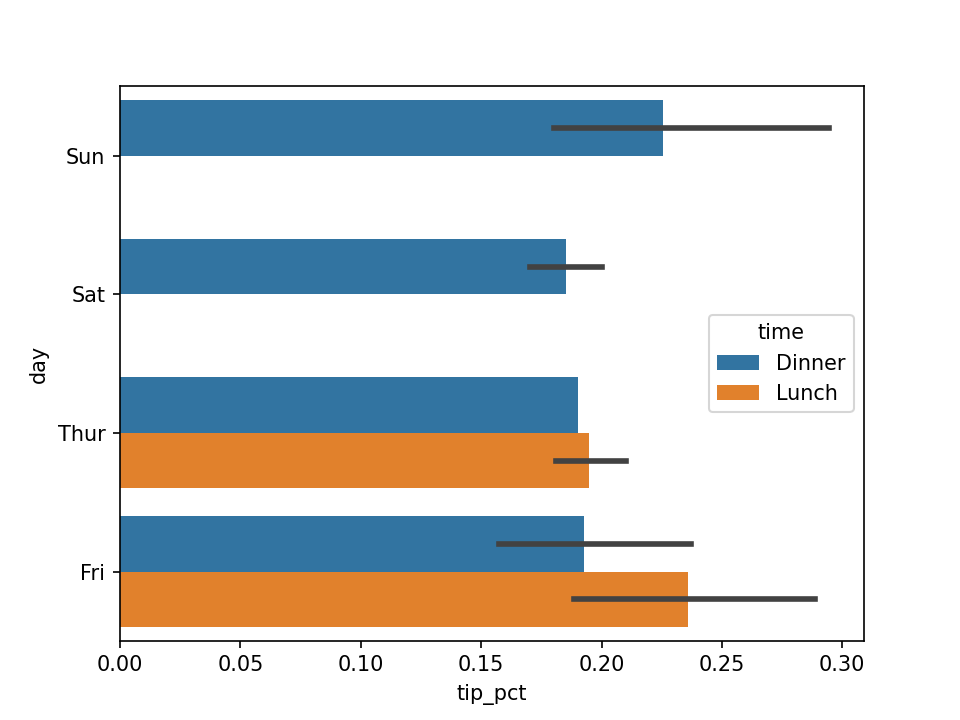

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [75]:
# Create a new Figure object
fig = plt.figure()

# Barplot by day and time
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and Density Plots
- A **histogram** is a kind of bar plot that gives a discretized display of value frequency.
- The data points are split into discrete, evenly spaced **bins**, and the number of data points in each bin is plotted.
- A related plot type is a **density plot**, which is formed by computing an estimate of a **continuous probability distribution** that might have generated the observed data. 
- The usual procedure is to approximate this distribution as a mixture of **“kernels”** — that is, simpler distributions like the normal distribution. 
- Thus, density plots are also known as **kernel density estimate** (KDE) plots.
- **seaborn** makes histograms and density plots even easier through its **distplot** method, which can plot both a histogram and a continuous density estimate simultaneously.

<IPython.core.display.Javascript object>


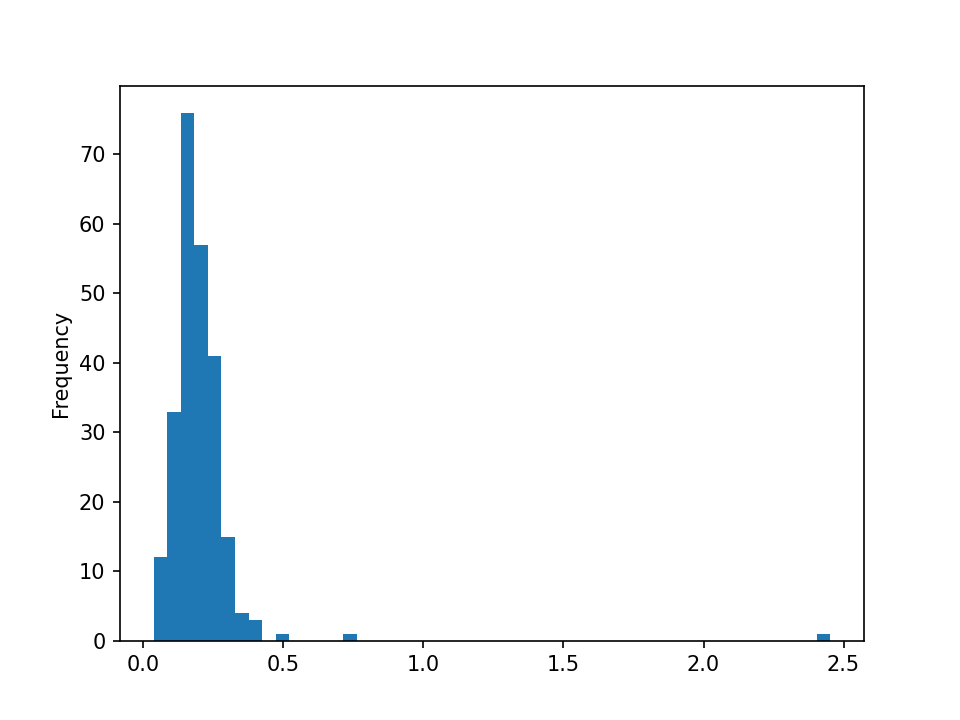

<AxesSubplot:ylabel='Frequency'>

In [76]:
# Create a new Figure object
fig = plt.figure()

# Histogram of tip percentages of the total bill
tips['tip_pct'].plot.hist(bins=50)

<IPython.core.display.Javascript object>


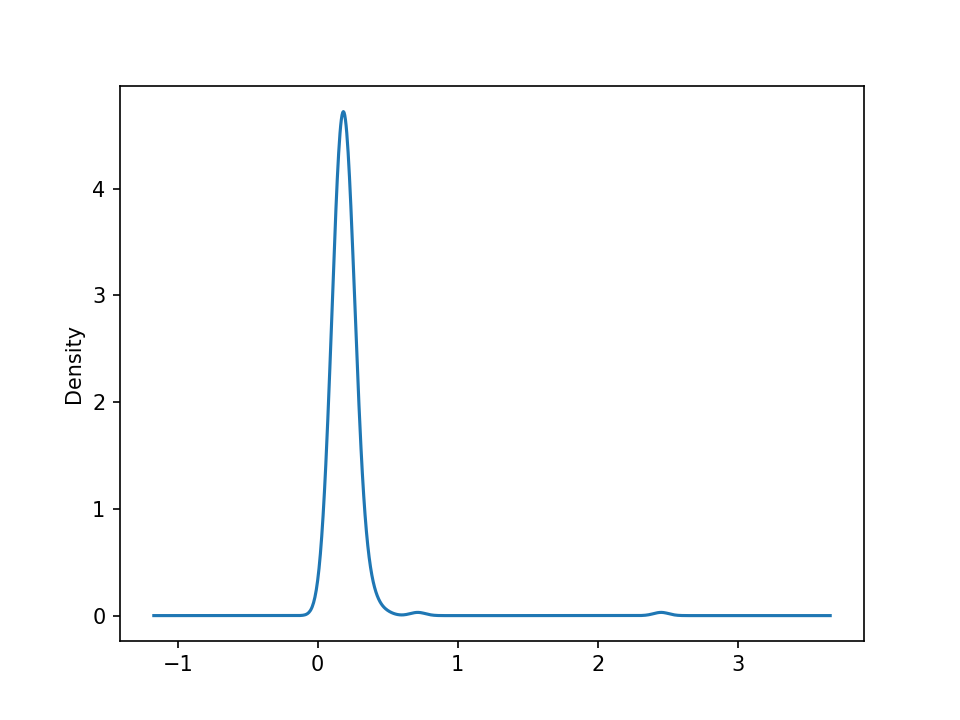

<AxesSubplot:ylabel='Density'>

In [77]:
# Create a new Figure object
fig = plt.figure()

# Density plot of tip percentages
tips['tip_pct'].plot.density()

<ipython-input-78-786ac0f3b425>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<IPython.core.display.Javascript object>


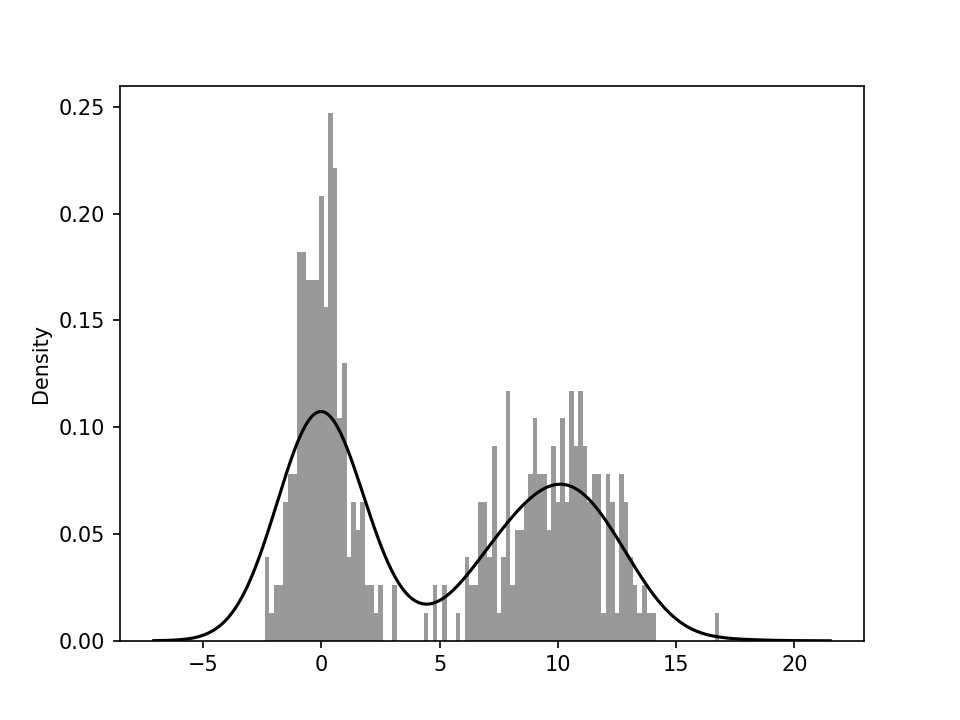

C:\Users\almne\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [78]:
# Create a new Figure object
fig = plt.figure()

# Normal distribution of random numbers
comp1 = np.random.normal(0, 1, size=200)

# Normal distribution of random numbers
comp2 = np.random.normal(10, 2, size=200)

# Combine the 2 normaldistributions of random numbers into a Series
values = pd.Series(np.concatenate([comp1, comp2]))

# Plot a histogram & density plot
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots
- **Point plots or scatter plots** can be a useful way of examining the relationship between two one-dimensional data series.
- seaborn’s **regplot** method makes a scatter plot and fits a linear regression line.
- In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a **pairs plot** or **scatter plot matrix**. 
- **seaborn** has a convenient **pairplot** function, which supports placing histograms or density estimates of each variable along the diagonal.

In [79]:
# load the macrodata dataset from the statsmodels project
macro = pd.read_csv('examples/macrodata.csv')

# Select a few columns
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

# Compute log differences
trans_data = np.log(data).diff().dropna()
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


<IPython.core.display.Javascript object>


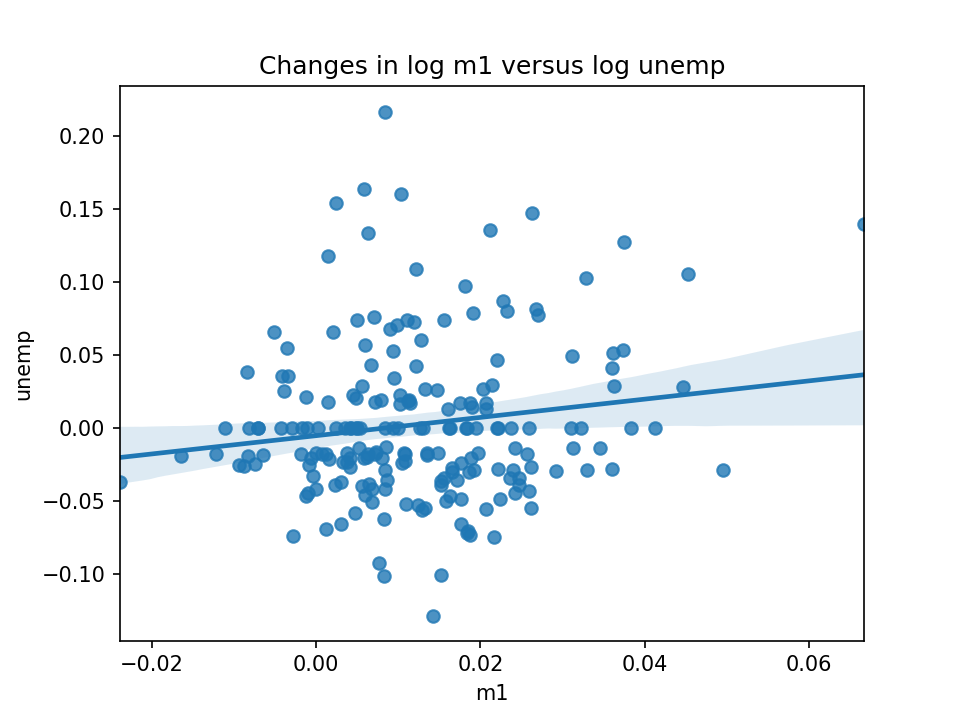

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [80]:
# Create a new Figure object
fig = plt.figure()

# Scatter plot with regression line
sns.regplot(x = 'm1', y = 'unemp', data=trans_data)

# Add a title
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

In [ ]:
# Create a pairs plot
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet Grids and Categorical Data
- One way to visualize data with many categorical variables is to use a **facet grid**. 
- **seaborn has** a useful built-in function **factorplot** that simplifies making many kinds of **faceted plots**.

<IPython.core.display.Javascript object>


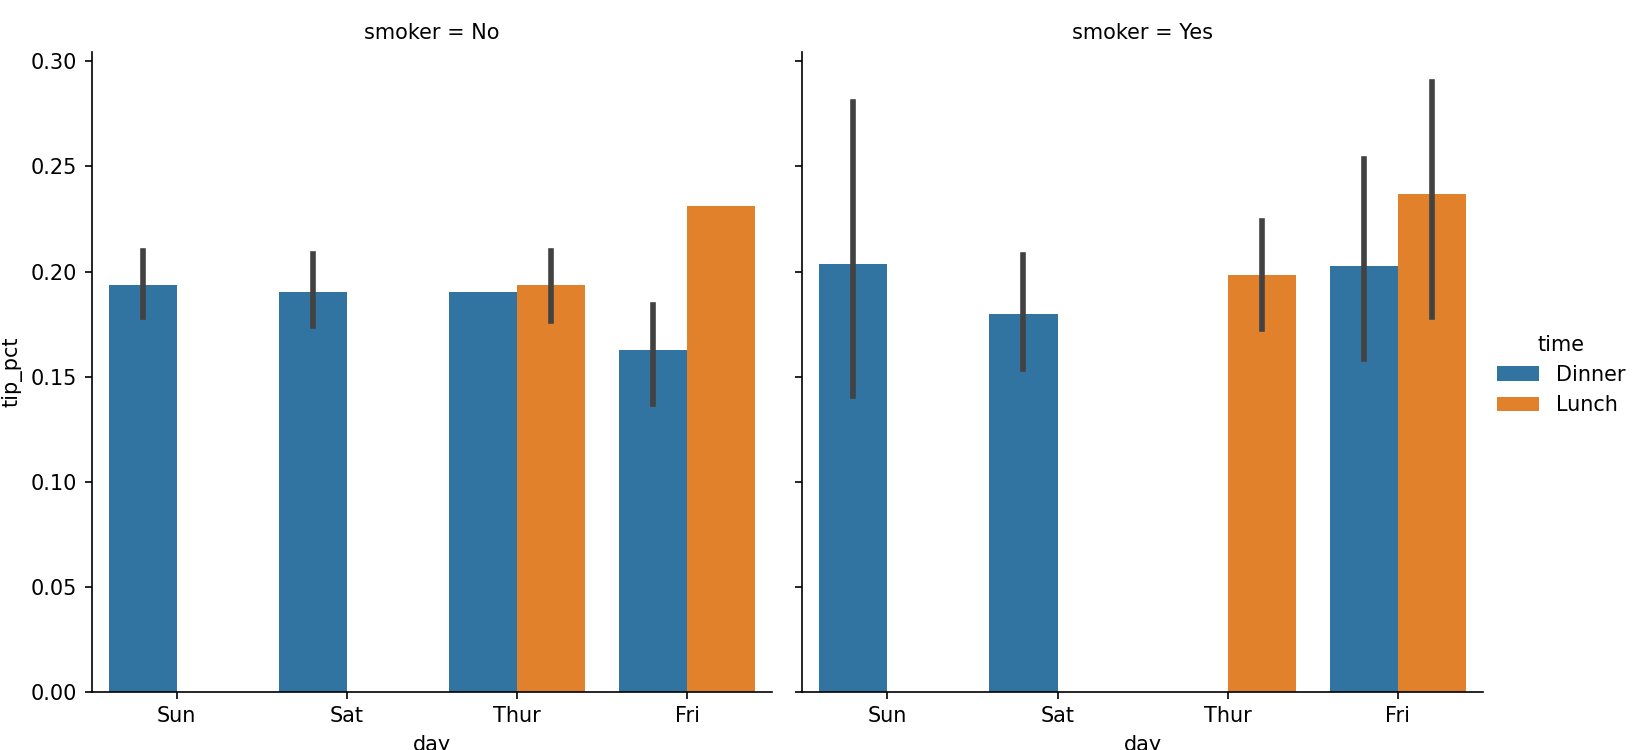

In [81]:
# Create a faceted plot
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


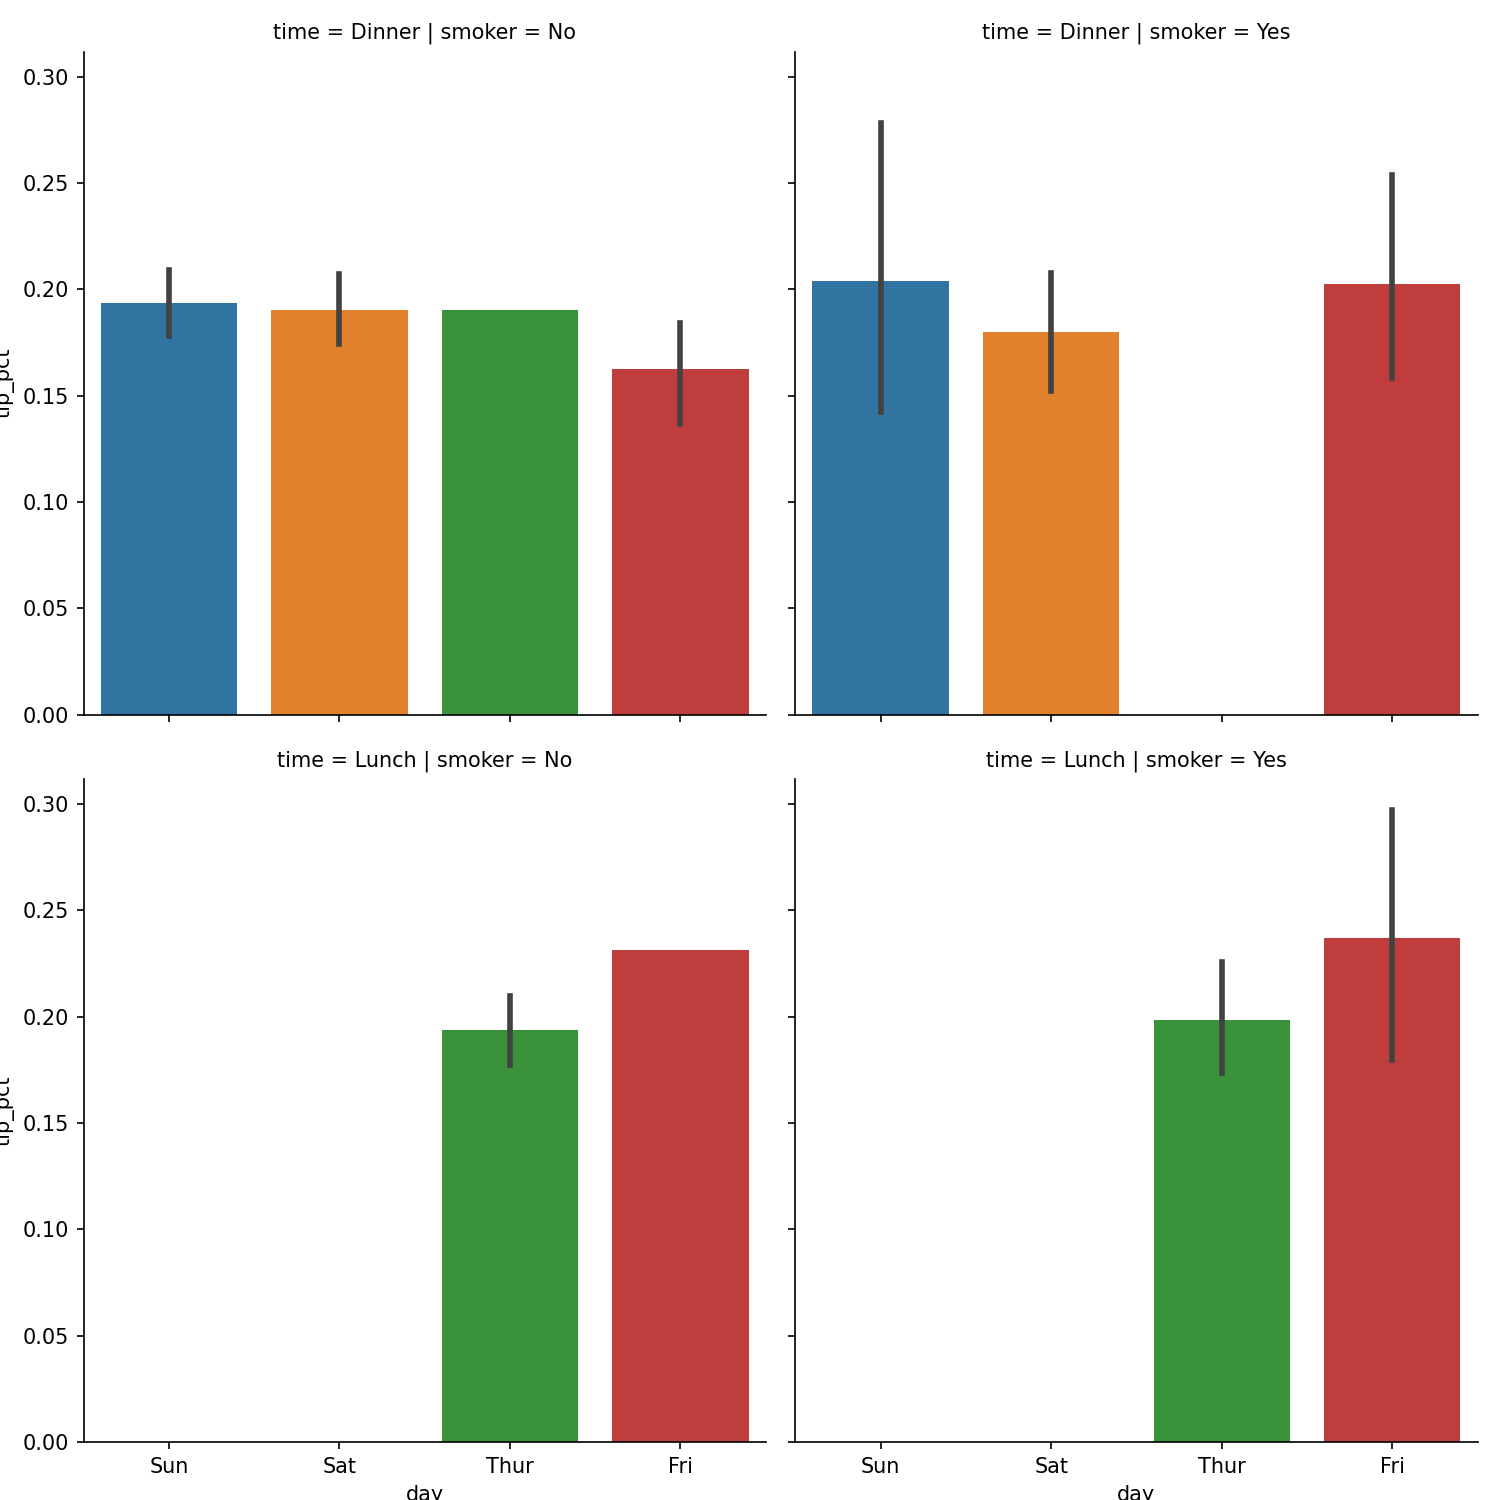

In [82]:
# tip_pct by day; facet by time/smoker
sns.catplot(x='day', y='tip_pct', row='time',
               col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


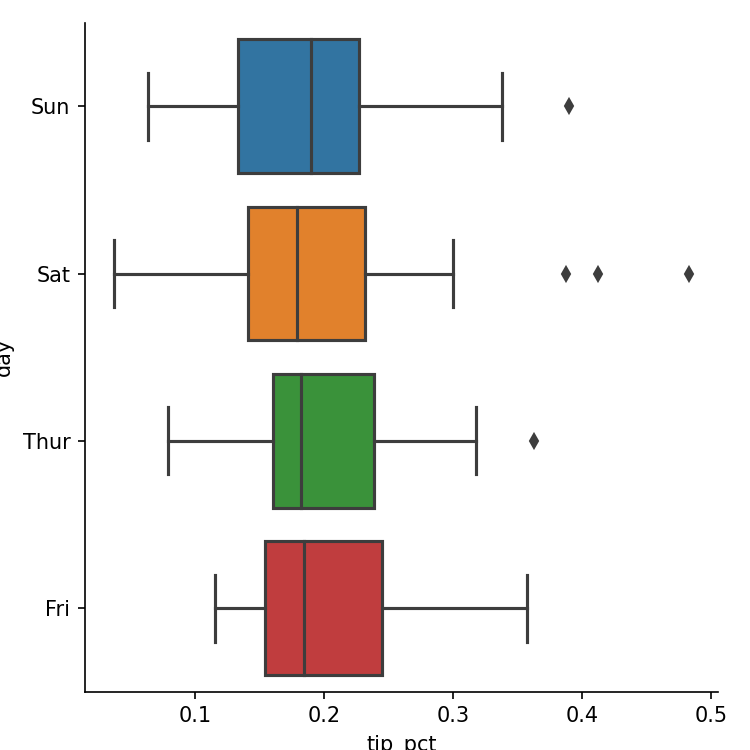

In [83]:
# Box plot of tip_pct by day
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

## Other Python Visualization Tools
- Check out this link to get an overview of the Python visualization landscape: https://pyviz.org/overviews/index.html